In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV,Ridge
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.pipeline import Pipeline

In [32]:
file = "/Users/saikatbasu/Documents/PersonalInformation_Oct2022/IBMDataScience-Coursera/LargeDataSets/bike+sharing+dataset/hour.csv"
df = pd.read_csv(file)

In [33]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [34]:
df = df.select_dtypes(include=['float','int'])

In [36]:
df.columns

Index(['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

<Axes: xlabel='hr', ylabel='cnt'>

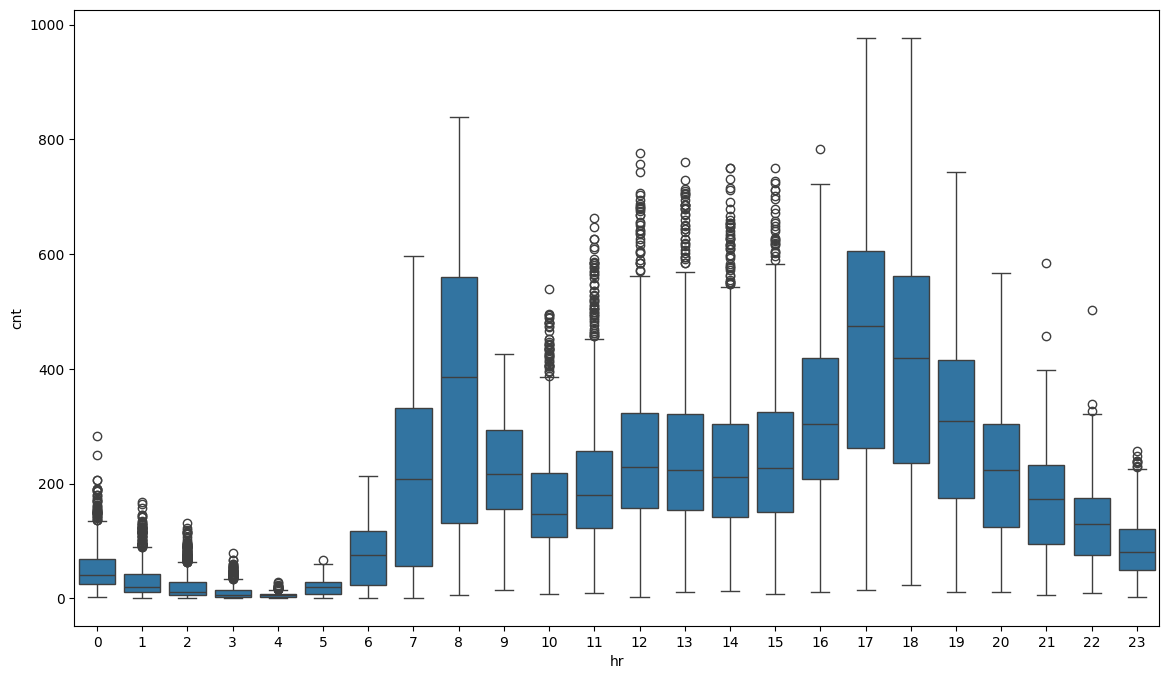

In [64]:
plt.figure(figsize=[14,8])
sns.boxplot(x="hr",y='cnt',data=df)

In [139]:
X = df[['hr','windspeed','temp']]
y = df['cnt']
lr = LinearRegression()

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [141]:
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [142]:
yhat = lr.predict(X_test)

/var/folders/vr/zjpq5dd116q29x13knn7gxb00000gn/T/ipykernel_91888/1187668622.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test,hist=False,color='r',label="TEST RENT COUNTS")
/var/folders/vr/zjpq5dd116q29x13knn7gxb00000gn/T/ipykernel_91888/1187668622.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed29

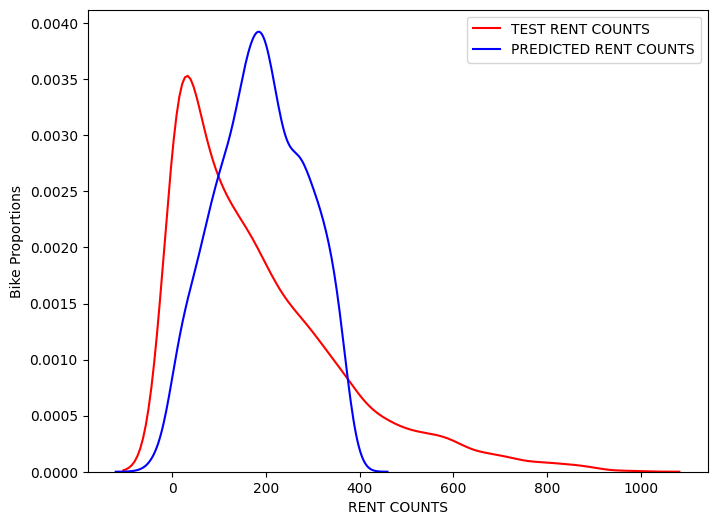

In [143]:
plt.figure(figsize=[8,6])
ax1 = sns.distplot(y_test,hist=False,color='r',label="TEST RENT COUNTS")
sns.distplot(yhat,hist=False,color='b',label="PREDICTED RENT COUNTS")
plt.xlabel("RENT COUNTS")
plt.ylabel("Bike Proportions")
plt.legend()

In [145]:
poly = PolynomialFeatures(degree=5, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [146]:
lr.fit(X_train_poly,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [168]:
yhat_poly = lr.predict(X_test_poly)

/var/folders/vr/zjpq5dd116q29x13knn7gxb00000gn/T/ipykernel_91888/3417976741.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test,hist=False,color='r',label="TEST RENT COUNTS")
/var/folders/vr/zjpq5dd116q29x13knn7gxb00000gn/T/ipykernel_91888/3417976741.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed29

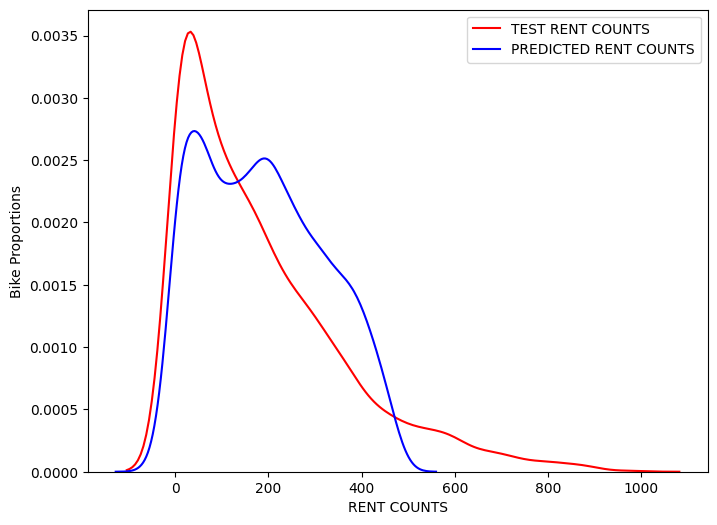

In [169]:
plt.figure(figsize=[8,6])
ax1 = sns.distplot(y_test,hist=False,color='r',label="TEST RENT COUNTS")
sns.distplot(yhat_poly,hist=False,color='b',label="PREDICTED RENT COUNTS")
plt.xlabel("RENT COUNTS")
plt.ylabel("Bike Proportions")
plt.legend()

In [170]:
pipeline = Pipeline([
    ("scaler",StandardScaler()),
    ("poly",PolynomialFeatures(degree=5, include_bias=False)),
    ("model",LinearRegression())])

In [171]:
pipeline.fit(X_train,y_train)

,steps,"[('scaler', ...), ('poly', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,degree,5
,interaction_only,False
,include_bias,False
,order,'C'


In [172]:
yhat_pipe = pipeline.predict(X_test)

/var/folders/vr/zjpq5dd116q29x13knn7gxb00000gn/T/ipykernel_91888/1187668622.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test,hist=False,color='r',label="TEST RENT COUNTS")
/var/folders/vr/zjpq5dd116q29x13knn7gxb00000gn/T/ipykernel_91888/1187668622.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed29

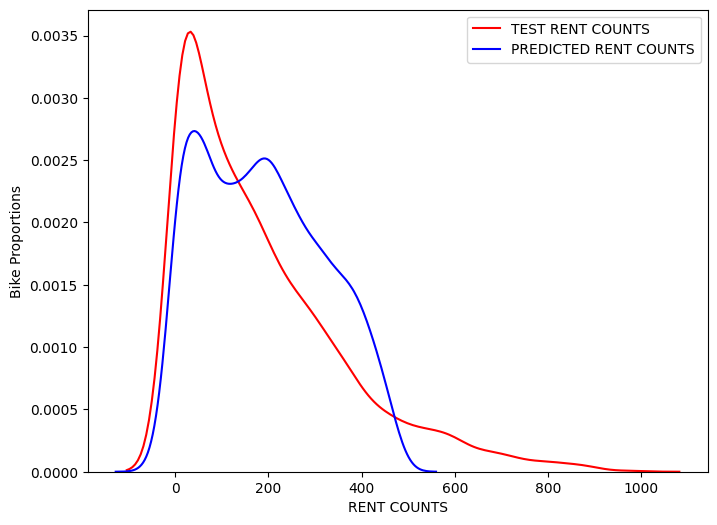

In [173]:
plt.figure(figsize=[8,6])
ax1 = sns.distplot(y_test,hist=False,color='r',label="TEST RENT COUNTS")
sns.distplot(yhat,hist=False,color='b',label="PREDICTED RENT COUNTS")
plt.xlabel("RENT COUNTS")
plt.ylabel("Bike Proportions")
plt.legend()

In [174]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['temp'],df['cnt'])
print("Pearson Coef: ",pearson_coef, "; P_value: ", p_value)

Pearson Coef:  0.4047722757786586 ; P_value:  0.0


In [175]:
rm = Ridge(alpha=100)

In [176]:
rm.fit(X_train_poly,y_train)


,alpha,100
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [177]:
yhat_rm = rm.predict(X_test_poly)

/var/folders/vr/zjpq5dd116q29x13knn7gxb00000gn/T/ipykernel_91888/1193108146.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test,hist=False,color='r',label="TEST RENT COUNTS")
/var/folders/vr/zjpq5dd116q29x13knn7gxb00000gn/T/ipykernel_91888/1193108146.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed29

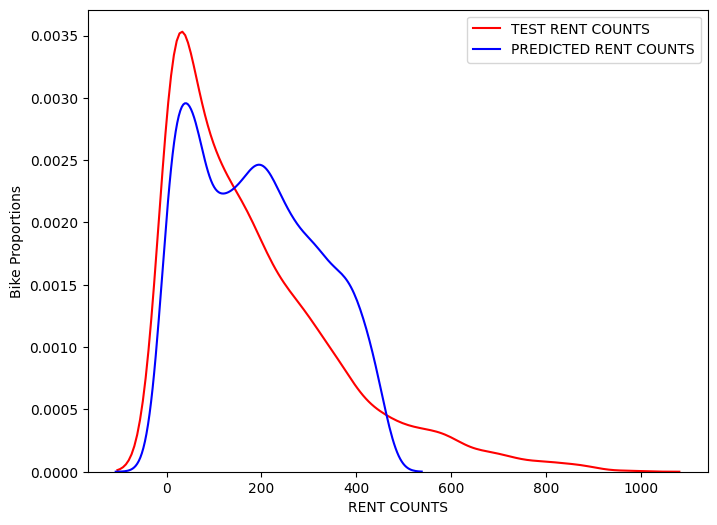

In [178]:
plt.figure(figsize=[8,6])
ax1 = sns.distplot(y_test,hist=False,color='r',label="TEST RENT COUNTS")
sns.distplot(yhat_rm,hist=False,color='b',label="PREDICTED RENT COUNTS")
plt.xlabel("RENT COUNTS")
plt.ylabel("Bike Proportions")
plt.legend()

In [179]:
mean_squared_error(X_test['windspeed'],y_test)

65817.61324088919

In [181]:
rm.score(X_test_poly,y_test)

0.5260859004553491

In [182]:
alpha = [10,100,1000]
scores = []
for num in range(10,100):
    rm = Ridge(alpha=num)
    rm.fit(X_train,y_train)
    scores.append(rm.score(X_test,y_test))

In [183]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,10))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(X_train, y_train)
    test_score, train_score = RigeModel.score(X_test, y_test), RigeModel.score(X_train, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|███████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 168.62it/s, Test Score=0.292, Train Score=0.277]


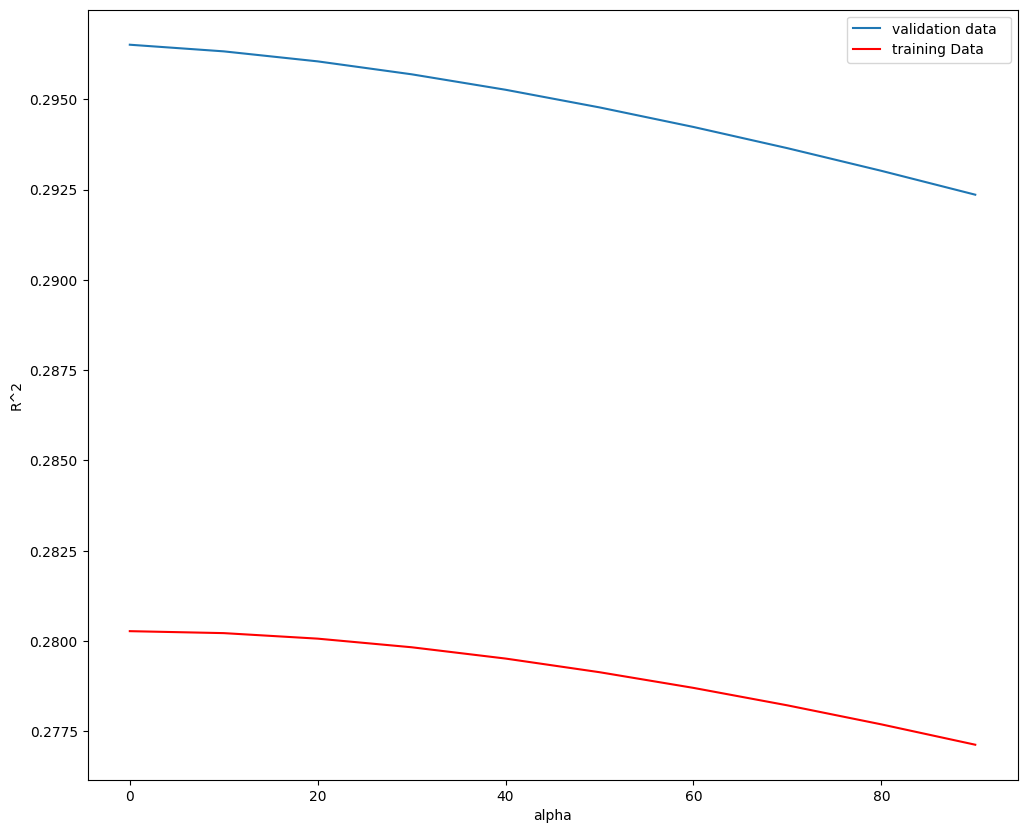

In [184]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

In [185]:
RM1 = Ridge()
params1 = [{'alpha':[0.001, 0.01, 0.1, 1, 10, 10, 100]}]

In [187]:
Grid1 = GridSearchCV(RM1,params1,cv=4)
Grid1.fit(X_train_poly,y_train)

/Users/saikatbasu/.pyenv/versions/3.12.2/lib/python3.12/site-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=2.12628e-20): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/Users/saikatbasu/.pyenv/versions/3.12.2/lib/python3.12/site-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.86449e-20): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/Users/saikatbasu/.pyenv/versions/3.12.2/lib/python3.12/site-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=2.188e-20): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/Users/saikatbasu/.pyenv/versions/3.12.2/lib/python3.12/site-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=2.19719e-20): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/Users/saikatbasu/.pyenv/versions/3.12.2/lib/python3.12/site-packages/scipy/_lib/_util.py:1233: Li

,estimator,Ridge()
,param_grid,"[{'alpha': [0.001, 0.01, ...]}]"
,scoring,None
,n_jobs,None
,refit,True
,cv,4
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,0.001


In [192]:
Grid1.score(X_test_poly,y_test)

0.5278007497079701

In [199]:
RM2 = Ridge()
params2 = [{'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10, 10, 100, 1000]}]
Grid2 = GridSearchCV(RM2,params2,cv=4)
Grid2.fit(X_train_poly,y_train)
print("GRID2 Score: ",Grid2.score(X_test_poly,y_test))
best_alpha = Grid2.best_params_['alpha']
print("Best Alpha: ", best_alpha)
BestRM = Ridge(alpha=best_alpha)
BestRM.fit(X_train_poly,y_train)

GRID2 Score:  0.5278007497079701
Best Alpha:  0.001


/Users/saikatbasu/.pyenv/versions/3.12.2/lib/python3.12/site-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=2.18003e-21): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/Users/saikatbasu/.pyenv/versions/3.12.2/lib/python3.12/site-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=4.4725e-21): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/Users/saikatbasu/.pyenv/versions/3.12.2/lib/python3.12/site-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=2.52965e-21): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/Users/saikatbasu/.pyenv/versions/3.12.2/lib/python3.12/site-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=2.31775e-21): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/Users/saikatbasu/.pyenv/versions/3.12.2/lib/python3.12/site-packages/scipy/_lib/_util.py:1233: L

,alpha,0.001
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [201]:
BestRM.score(X_test_poly,y_test)

0.5278007497079701

In [203]:
yhat_best_rm = Grid2.predict(X_test_poly)

/var/folders/vr/zjpq5dd116q29x13knn7gxb00000gn/T/ipykernel_91888/4160575864.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test,hist=False,color="r", label="Test Rental Counts")
/var/folders/vr/zjpq5dd116q29x13knn7gxb00000gn/T/ipykernel_91888/4160575864.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147e

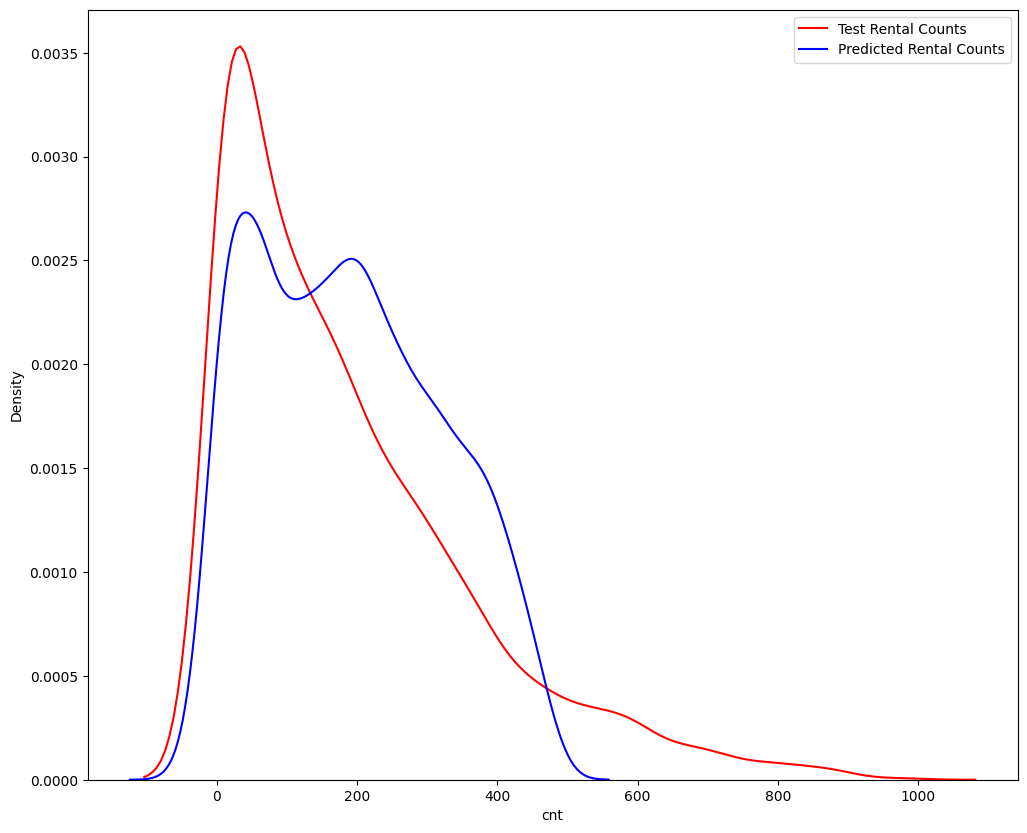

In [205]:
plt.figure(figsize=[12,10])
ax1 = sns.distplot(y_test,hist=False,color="r", label="Test Rental Counts")
sns.distplot(yhat_best_rm,hist=False,color="b", label="Predicted Rental Counts")
plt.legend()